In [14]:
%load_ext autoreload
%autoreload 2

import sklearn
import os, sys
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

sys.path.insert(1, os.path.join(sys.path[0], ".."))
from reproduction.pipeline.load import load_data
from reproduction import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
DATA = "../data/tif/*.tfrecord"
ENCODER_DEF = "../output/mod09cnn15b/encoder.json"
ENCODER_WEIGHTS = "../output/mod09cnn15b/encoder-585000.h5"
N_CLUSTERS = 60

In [3]:
with open(ENCODER_DEF,"r") as f:
    encoder = tf.keras.models.model_from_json(f.read())
encoder.load_weights(ENCODER_WEIGHTS)

In [5]:
data = analysis.AEData(load_data(DATA, encoder.input_shape[1:]), n=5000)
data.add_encoder(encoder)

In [41]:
# ag1 = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit_predict(data.encs[:2500])
ag2 = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit(data.encs)

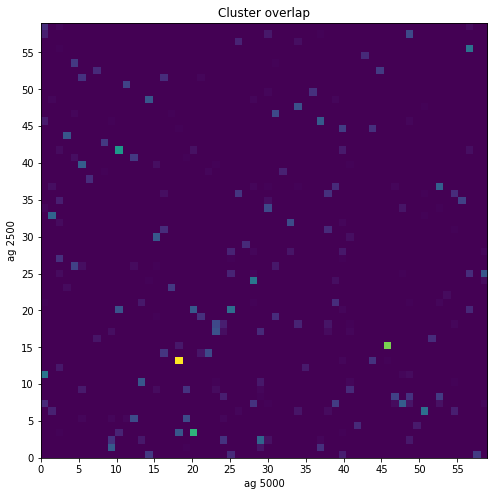

In [36]:
plt.figure(figsize=(8,8))
plt.hist2d(ag1, ag2[:2500], bins=60);
plt.title("Cluster overlap")
plt.xticks(range(0, 60, 5)); plt.yticks(range(0, 60, 5));
plt.xlabel("ag 5000"); plt.ylabel("ag 2500");

In [21]:
sklearn.metrics.adjusted_mutual_info_score(ag1, ag2[:2500])

/anaconda3/envs/clouds/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7194084755835245

In [25]:
overlap = data.imgs[:2500,:,:,0][ag1 == ag2[:2500]]
overlap_c = ag1[ag1 == ag2[:2500]]



IndexError: index 32 is out of bounds for axis 0 with size 32

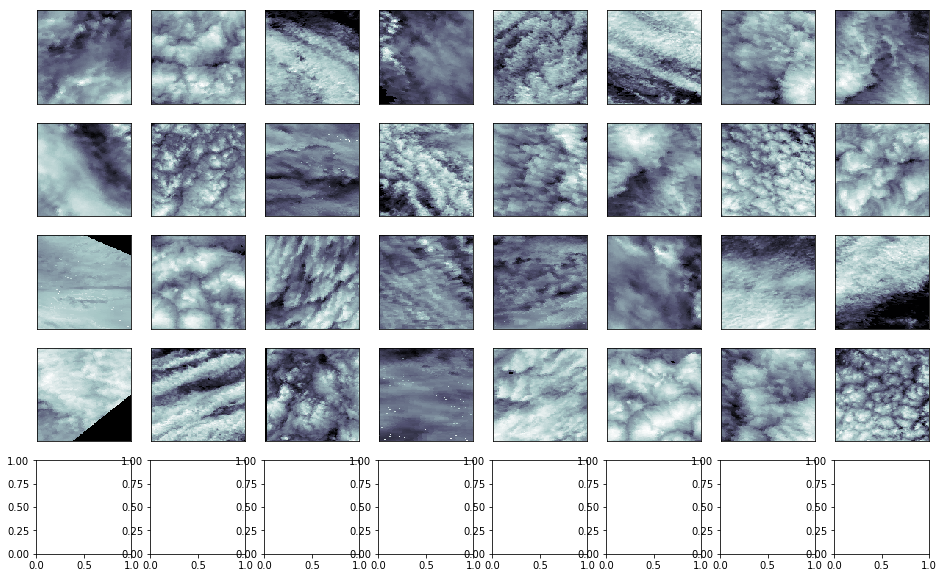

In [37]:
fig, ax = plt.subplots(5, 8, figsize=(16, 10))

clu = data.imgs[:2500,:,:,0][ag1 == 3]

for i, a in enumerate(ax.ravel()):
    a.imshow(clu[i], cmap="bone")
    a.set_xticks([])
    a.set_yticks([])



In [45]:

from scipy.cluster.hierarchy import dendrogram

In [46]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



Well that's not useful...

In [50]:
plt.figure(figsize=(500,100))
plot_dendrogram(ag2, labels=ag2.labels_)